In [36]:
import os
import sys
import coffea.util
# local
sidm_path = str(os.getcwd()).split("/sidm")[0]
# sidm_path = str(sys.path[0]).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import utilities
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [37]:
sample = "2Mu2E_200GeV_5p0GeV_20p0mm"
channel = "base"

In [26]:
out_main = coffea.util.load(f"./main_{sample}.coffea")['out'][sample]
out_simple = coffea.util.load(f"./simplified_{sample}.coffea")['out'][sample]

In [30]:
print("main")
out_main['cutflow'][channel].print_table()
print()
print("simplified")
out_simple['cutflow'][channel].print_table()

main
cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection                 59.8         59.8
pass triggers                17.4         17.4
PV filter                    59.8         17.4
>=2 LJs                      33.8         11.8

simplified
cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection                 59.8         59.8
pass triggers                17.4         17.4
PV filter                    59.8         17.4
>=2 LJs                      30.2         10.1


In [ ]:
def plot_row(hists, legend):
    plt.subplots(1, len(hists), figsize=(12*len(hists), 10))
    for ix, h in enumerate(hists):
        plt.subplot(1, len(hists), ix+1)
        utilities.plot([
            out_main["hists"][h][channel, :],
            out_simple["hists"][h][channel, :],
        ])
        plt.legend(["main", "simplified"])

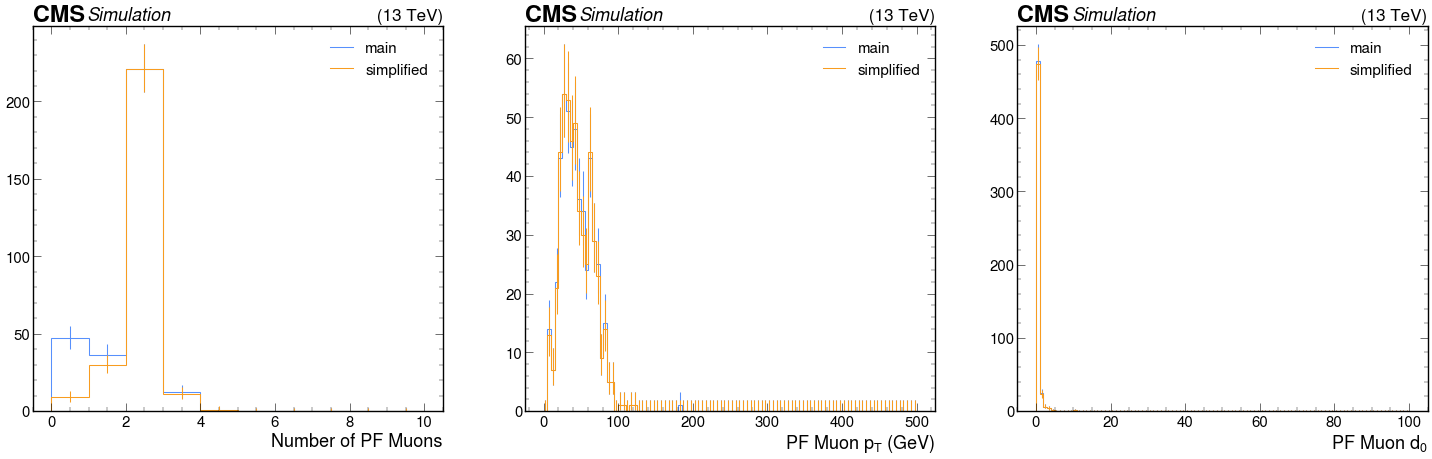

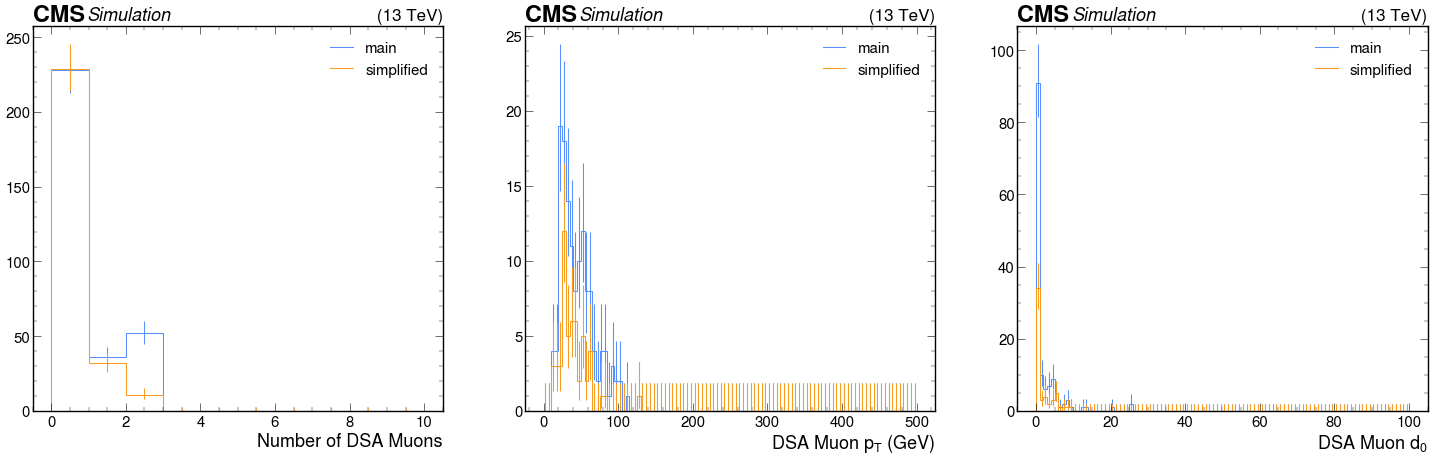

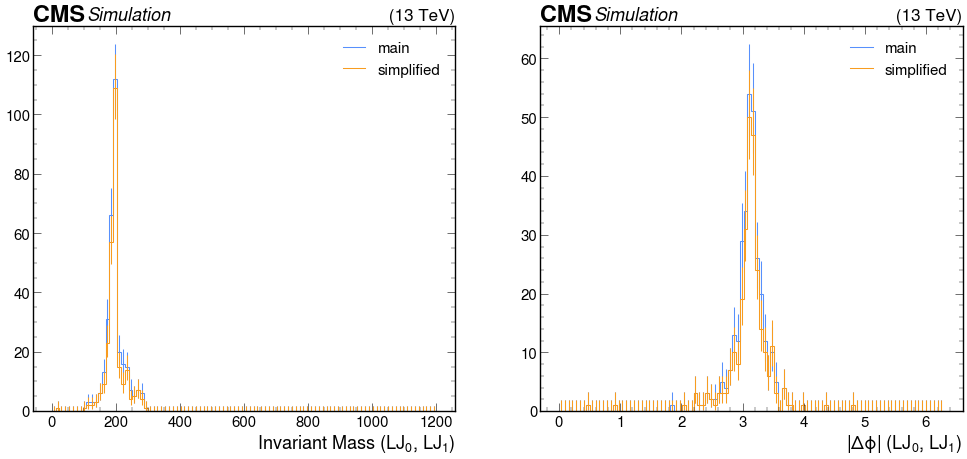

In [52]:
hists = [
    "dsaMuon_n",
    "lj_lj_invmass",
    "dsaMuon_pt",
]

plot_row(["muon_n", "muon_pt", "muon_dxy"], ["main", "simplified"])
plot_row(["dsaMuon_n", "dsaMuon_pt", "dsaMuon_dxy"], ["main", "simplified"])
plot_row(["lj_lj_invmass", "lj_lj_absdphi"], ["main", "simplified"])